In [1]:
import sys
import json
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
import matplotlib.pyplot as plt
from snudda.utils.load import SnuddaLoad

In [2]:
external = os.path.join("/media","jofrony", "2TB", "dardel","current_bgd2","firing_threshold", "surround_inhibition", "supercomputer", "networks")

In [3]:
cell_ids = json.load(open(os.path.join("..", "..","..","..","networks", "pdc_network_2022-12-20", "cell_ids_dardel_p1.json")))

In [4]:
folder = "frequency"

In [5]:
parameters = {"start": 0.1, "end": 2.5}

In [6]:
e = Experiments() 
e.add_experiment(name="70mV",
                 color="red",
                 label="2500 ms stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-12-20"),
                 output="network_output_external-input-dardel-2022-12-20-18-37-10-p1_cell_ids_current_injection_dardel_2022-12-22-02-03-51_presynaptic_to_p1.hdf5")

   

In [7]:
sl = LoadSimulations(experiments=e)
sl.load_network_file(load_synapses=False)

Loading 40000 neurons with 48976337 synapses and 2630 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/firing_threshold/surround_inhibition/supercomputer/networks/pdc_network_2022-12-20/simulation/network_output_external-input-dardel-2022-12-20-18-37-10-p1_cell_ids_current_injection_dardel_2022-12-20-18-29-11_presynaptic_to_p1.hdf5


In [8]:
neuron_type="SPN"
specific_trace_ids = {k: cell_ids["iSPN"][::10]+cell_ids["dSPN"] for k in e.experiments}
dt_step=0.5

In [9]:
%%time
dendritic_voltage = dendrite_voltage(data_obj=sl, 
                                     neuron_type=neuron_type, 
                                     specific_trace_ids=specific_trace_ids,
                                     interval=[0, 2.5], 
                                     dt_step=dt_step)

average_dendritic_voltages = average_dendritic_voltage(dvoltage=dendritic_voltage)


  SPN and 191 traces
CPU times: user 3.84 s, sys: 173 ms, total: 4.01 s
Wall time: 4.94 s


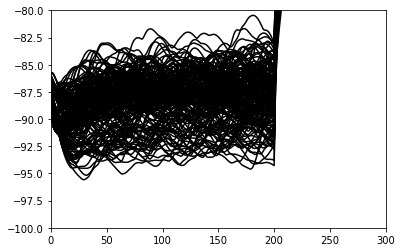

In [12]:
cell_ids_s = cell_ids["iSPN"][::10]+cell_ids["dSPN"]
c = {"70mV":"black"}
plt.figure()
for cs in cell_ids_s:

    for exp in dendritic_voltage:
        plt.plot(dendritic_voltage[exp][cs][1], color=c[exp])
plt.xlim((0,300))
plt.ylim((-100,-80))
plt.show()
    

In [ ]:
cell_ids_s = cell_ids["iSPN"][::10]+cell_ids["dSPN"]
c = {"70mV":"black"}
for cs in cell_ids_s:
    
    for i in range(1,20):
        plt.figure()
        plt.title(f"Cell id {cs} sec id {i}")

        for exp in dendritic_voltage:
            plt.plot(dendritic_voltage[exp][cs][i], color=c[exp])
    plt.show()
    

In [ ]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np
for exp, data in average_dendritic_voltages.items():
    v_s = list()
    for cell_id, v in data.items():
        
        if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
            plt.plot(v)
            v_s.append(v[skip:])
        
    tmp.update({exp: np.mean(v_s, axis=0)})
    tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

In [ ]:
tmp = dict()
tmp_corrected = dict()
skip = 500
import numpy as np

v_s = list()
data = average_dendritic_voltages["70mV"]
for cell_id, v in data.items():

    if np.max(dendritic_voltage[exp][cell_id][1]) < -45:
        plt.plot(v)
        v_s.append(v[skip:])

tmp.update({exp: np.mean(v_s, axis=0)})
tmp_corrected.update({exp: np.mean(v_s, axis=0) - np.min(np.mean(v_s, axis=0))})

In [ ]:
cs = {"p1_with_ex": 'black', 
      "p1_with_ex_current_injection_presynaptic": 'red'}

In [ ]:
plot_average_dendritic_voltage(tmp, name="dSPN", colors=cs, dt_step=0.5e-3)

In [ ]:

plot_average_dendritic_voltage(tmp_corrected, name="dSPN", colors=cs, dt_step=0.5e-3)
auc = calculate_AUC(tmp, parameters={"dx":0.5e-3})
plot_AUC(auc, experiment_names=e,colors=cs, name="dSPN")